## Estimadores não viesados e distribuição amostral
### Experimentos simples: Distribuição amostral da média, distribuição amostral da variãncia, distribuição amostral da proporção

Suponha um experimento de lançar um dado cinco vezes, o que podemos dizer, se o evento continuasse indefinidamente, sobre os parâmetros, populacionais, da média e variância?

Estimadores não viésados: <br>
- Média das médias amostrais;<br>
- Média das Variâncias amostrais;<br>
- Média das proporções amostrais;<br>
Esses três estimadores tendem para os parâmetros populacionais a medida que o número de amostras aumentam.

Vamos supor quatro experimentos: <br>
- Lançamento do dado 100 vezes;
- Lançamento do dado 1000 vezes;
- Lançamento do dado 5000 vezes;
- Lançamento do dado 10000 vezes;

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [156]:


def gerandoAmostras_lancamentoDado(quant_amostras, quant_lancamentos=5):
    '''Gera amostras aleatórias de um experimento de lançamento de dado.
        quant_amostras: Quantidade de amostras aleatórias que se deseja gerar.
        quant_lancamentos: Quantidade de lançamentos por amostra.
    
    return: 
        Tem o formato:
        array([[3, 6, 5, 3, 3],
               [3, 5, 2, 5, 4],
               [3, 2, 3, 1, 3])), em que cada row representa um experimento independente, para esse caso:
        quant_amostras = 3, quant_lancamentos=5.
    '''
    amostras = np.array([[]]) # Armazena cada amostra
    
    for i in range(quant_amostras):
        amostra = []
        
        for j in range(quant_lancamentos):
            val = np.random.randint(1,7) # gerando valores aleatórios entre 1 e 6 (lançamento de um dado)
            amostra.append(val)
        
        if(amostras.size == 0):
            amostras = np.array([amostra])
        else:
            amostras = np.append(amostras, np.array([amostra]), axis=0)
    
    return amostras


def calculaMediasAmostras(amostras):
    '''Calcula as médias amostrais de um conjunto de amostras
        amostras: Supõe o formato de saída da função "gerandoAmostras_lancamentosDado".
    '''
    medias_amostras = np.array([])
    
    for amostra in amostras:
        medias_amostras = np.append(medias_amostras, amostra.mean())
    
    return medias_amostras


def calculaVarianciasAmostrais(amostras):
    
    variancias_amostrais = np.array([])
    
    for amostra in amostras:
        variancias_amostrais = np.append(variancias_amostrais, np.var(amostra, ddof=1))
    
    return variancias_amostrais



In [157]:

#Experimentos
exp_length = [100, 1000, 5000, 10000] # Cada valor para o tamanho amostral representa um experimento.
medias_experimentos = []
variancias_experimentos = []

for e in exp_length:
    exp = gerandoAmostras_lancamentoDado(e)
    medias_experimentos.append(calculaMediasAmostras(exp))
    variancias_experimentos.append(calculaVarianciasAmostrais(exp))



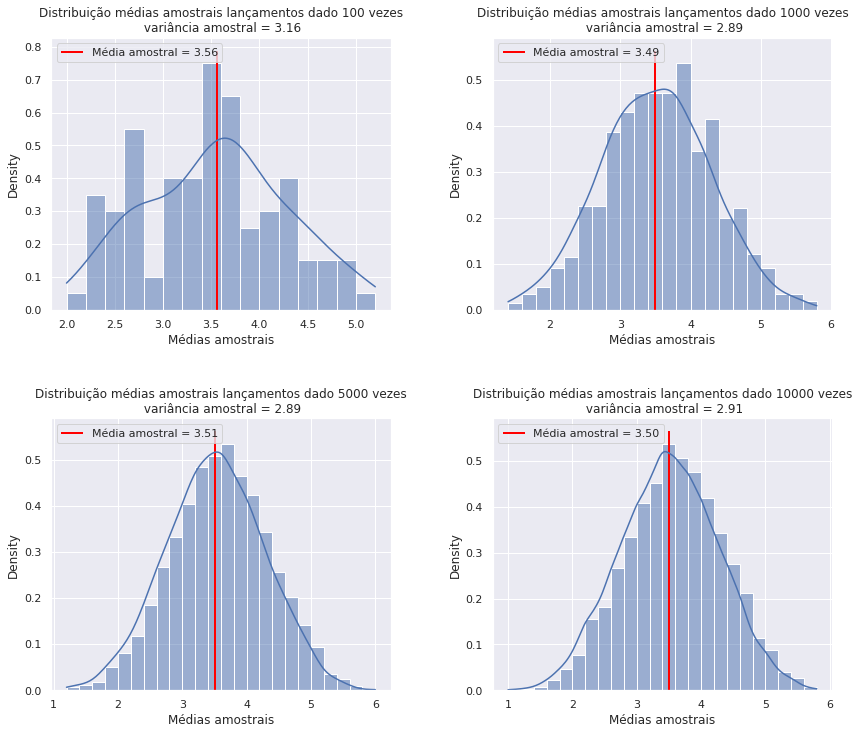

In [158]:
# PLOTS

fig, axe = plt.subplots(2,2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for exp, axe in enumerate(axe.flat):
    med_amostral = np.mean(medias_experimentos[exp])
    variancia_amostral = np.mean(variancias_experimentos[exp])
    sns.histplot(medias_experimentos[exp], stat = 'density', ax=axe,binwidth=0.2, kde=True)
    axe.vlines(med_amostral, axe.get_ylim()[0], axe.get_ylim()[1], lw=2, color='red', label='Média amostral = {0:.2f}'.format(med_amostral))
    axe.set_xlabel('Médias amostrais')
    axe.set_title('Distribuição médias amostrais lançamentos dado {0} vezes\n variância amostral = {1:.2f}'.format(exp_length[exp], variancia_amostral))
    axe.legend(loc='upper left')

plt.show()

Podemos observar que se continuarmos indefinidamente a distribuição das médias amostrais tende para uma distribuição Normal.<br> Calculando a média e a variância da população, temos:

In [159]:
media_populacional = np.mean(np.arange(1,7))
variancia_populacional = np.var(np.arange(1,7))

print('Média populacional: {0:.2f}'.format(media_populacional))
print('Variância populacional: {0:.2f}'.format(variancia_populacional))

Média populacional: 3.50
Variância populacional: 2.92


Temos então que os <b>Estimadores não viésados</b> tendem para os parâmetros populacionais quando a quantidade de amostras aumenta. 